# <img style="float: left; padding-right: 10px; margin-top: 5px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B: Advanced Topics in Data Science

###  Measuring the Shape and Brightness of Galaxies with Neural Networks

### Project Team (Group 75): Dmitry Vukolov, Ning Xu, Rohit Beri, Sunil Chomal


**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Pavlos Protopapas, Mark Glickman and Chris Tanner<br/>
**Project Advisors**: Douglas Finkbeiner and Jun Yin<br/>

Hello everyone. My name is Ning and my team members are Dmitry, Rohit, and Sunil.

# Problem Statement

**Vast amounts of data:** As astronomers collect more and more image data, there is a need for further development of automated, reliable, and fast analysis methods.

**Traditional methods:** For example, to describe a galaxy, software is used to fit a parametric or a non-parametric model and estimate the galaxy's brightness, shape, size, and orientation. A commonly used, though not a perfect model, is the [Sérsic profile](https://en.wikipedia.org/wiki/Sersic_profile), developed in 1963.

**New methods:** In recent years, researchers have started exploring the application of deep learning methods to analyze astronomical data. For instance, classification of galaxies using CNNs has demonstrated high levels of accuracy.

### Objective: *Explore deep neural network architectures to estimate galaxy parameters from simulated data.*

Astronomers are collecting millions of digital images and need automated, reliable, and fast methods for analyzing the data. Our team explored deep neural networks to estimate the shape and brightness of galaxies.

# Data Generation

### Datasets
We generate three datasets with increasing complexity for parameter estimation:
  
| Dataset | Number of Samples | PSF             | Gaussian Noise Level | Signal-to-Noise Ratio |
| ------- | ----------------- | --------------- | -------------------- | --------------------- |
| 1.      | 200,000           | 0.5             | 200                  | From 10 to 100        |
| 2.      | 200,000           | 0.5             | From 200 to 400      | From 10 to 100        |
| 3.      | 200,000           | From 0.5 to 1.0 | From 200 to 400      | From 10 to 100        |
  
We simulate ***200,000 observations*** in total, using ***180,000 samples for training*** and ***20,000 for validation***. 
<br>

### Target variables
We estimate the following five parameters from image data:

- Sérsic profile: determined by the **Sérsic index** and the **Sérsic radius**
- Galaxy **flux**
- Reparameterized **ellipticity and orientation**: $g_1$ and $g_2$

We generated three datasets of increasing complexity containing 200,000 simulated galaxy images each. We went from a dataset with fixed PSF and Gaussian noise levels to one with varying PSF and noise.

# Exploratory Data Analysis

**Interactive app**: To understand the relationship between galaxy parameters and the resulting images we create a web app at [https://measure-galaxies.herokuapp.com](https://measure-galaxies.herokuapp.com):

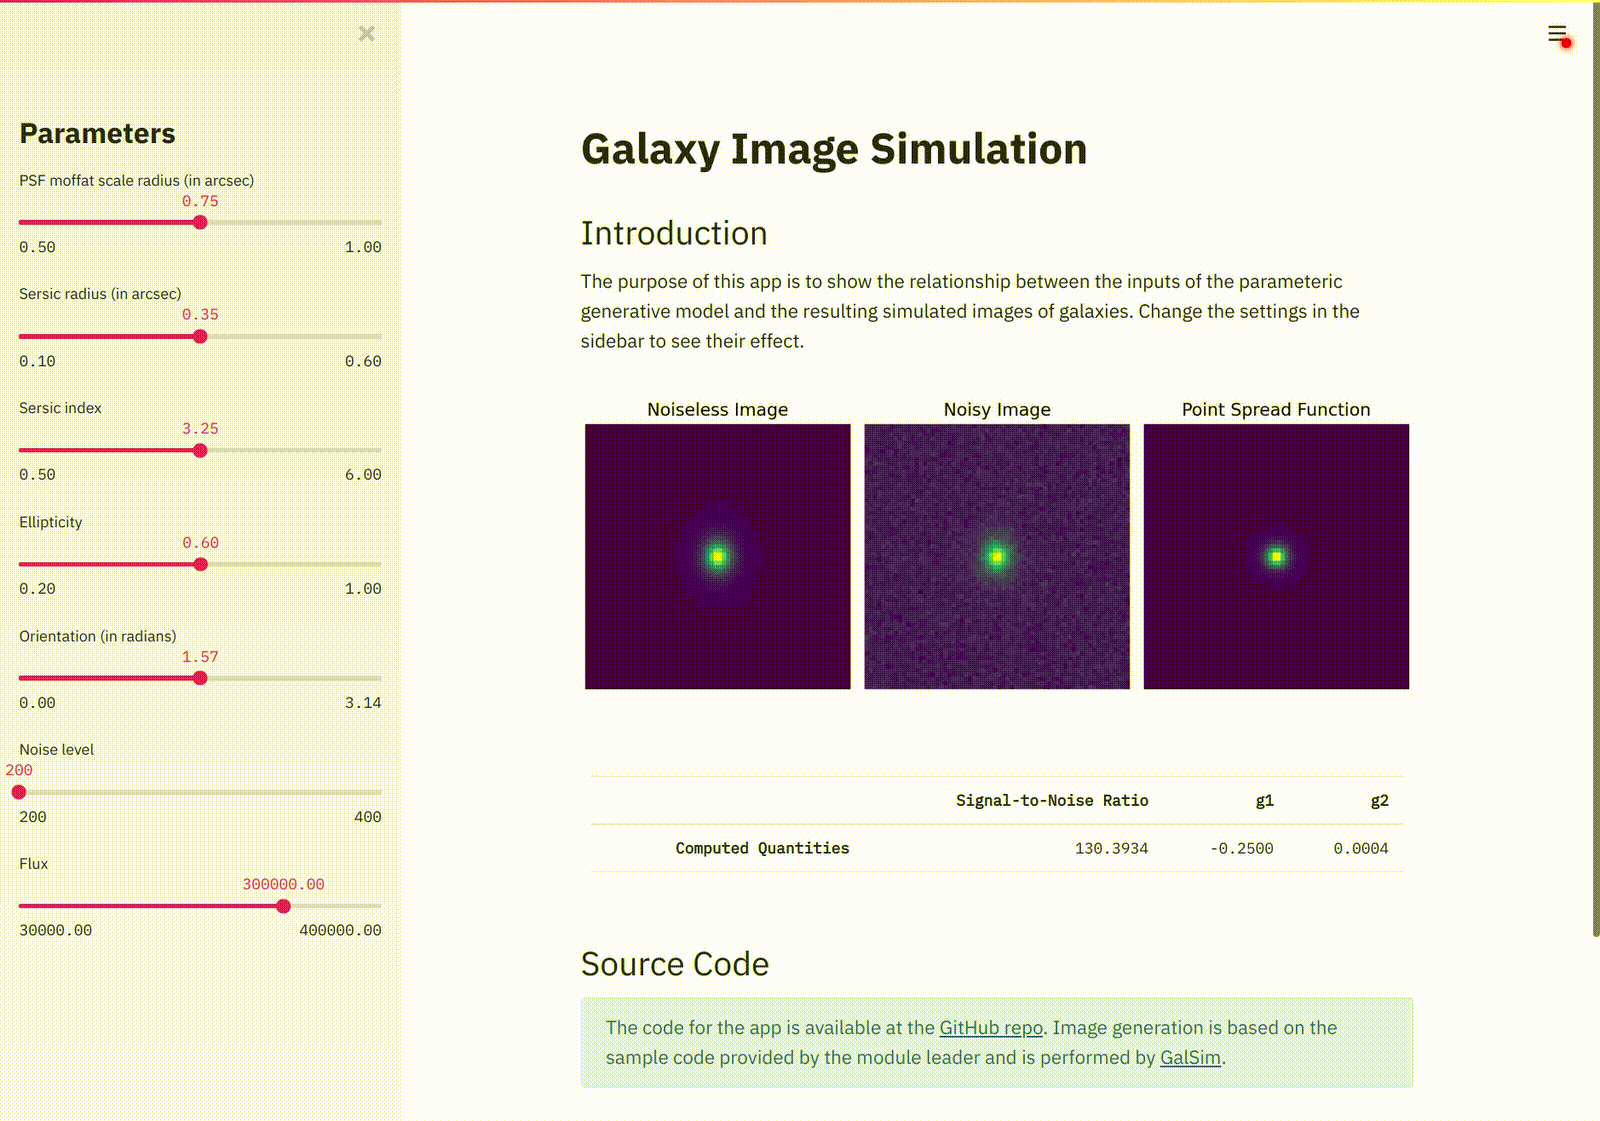

We created an interactive app to understand the impact of each attribute on the generated image. The EDA helped us formulate that:
- The Sérsic index is very difficult to estimate making it an important parameter when doing model selection.
- The simulated images form a perfect dataset, free of outliers and irregularities. It is worth exploring smaller neural networks to capture the underlying dependencies.
- The PSF and the noise levels have a significant effect on the obtained images; where possible, they should be used as inputs to the model.
- Given the availability of noiseless images, models that take advantage of this additional information should be explored.

# Modeling Experiments

- **Autoencoders:** Have two potential advantages:
  - First, an autoencoder is learning from both the labels and the noiseless images and thereby might incorporate more information about the underlying relationships into the network.
  - Secondly, an autoencoder can be used not only to predict the labels but also to denoise and reconstruct the images.

- **Neural architecture search:** <img style="float: right; padding-left: 10px; padding-bottom: 20px;" src="https://autokeras.com/img/row_red.svg" width="200" />We run [AutoKeras](https://autokeras.com/), an AutoML tool, to quickly test vanilla CNNs, ResNets, and Xception networks with different complexities, regularization, and normalization parameters.

- **Grid search of hyperparameters:** We pick several key hyperparameters of the best model, expand their range, and evaluate the effect using a small portion of the data.

- **Denoising pipeline:** Informed by a large gap between performance metrics for noiseless and noisy data, we test a two-stage pipeline described in [Madireddy (2019)](https://arxiv.org/pdf/1911.03867) that uses a separate denoising network as the first step.

We pursue multiple research directions in our model building:

First, autoencoders. These have a potential advantage of learning both from the labels and the noiseless images, thereby incorporating more information about the underlying relationships into the network.

We also perform neural architecture search with the help of AutoKeras. We quickly test and compare models of varying complexities, regularization, and normalization.

We then pick a few key hyperparameters of the best model and conduct a grid search on a small subset of the data. This allows us to significantly reduce the model size and its computational cost while maintaining performance.

Finally, observing a large gap between predictive performance on noisy and noiseless images, we explore a two-stage denoising pipeline described in the literature.

# Modeling: Architectures

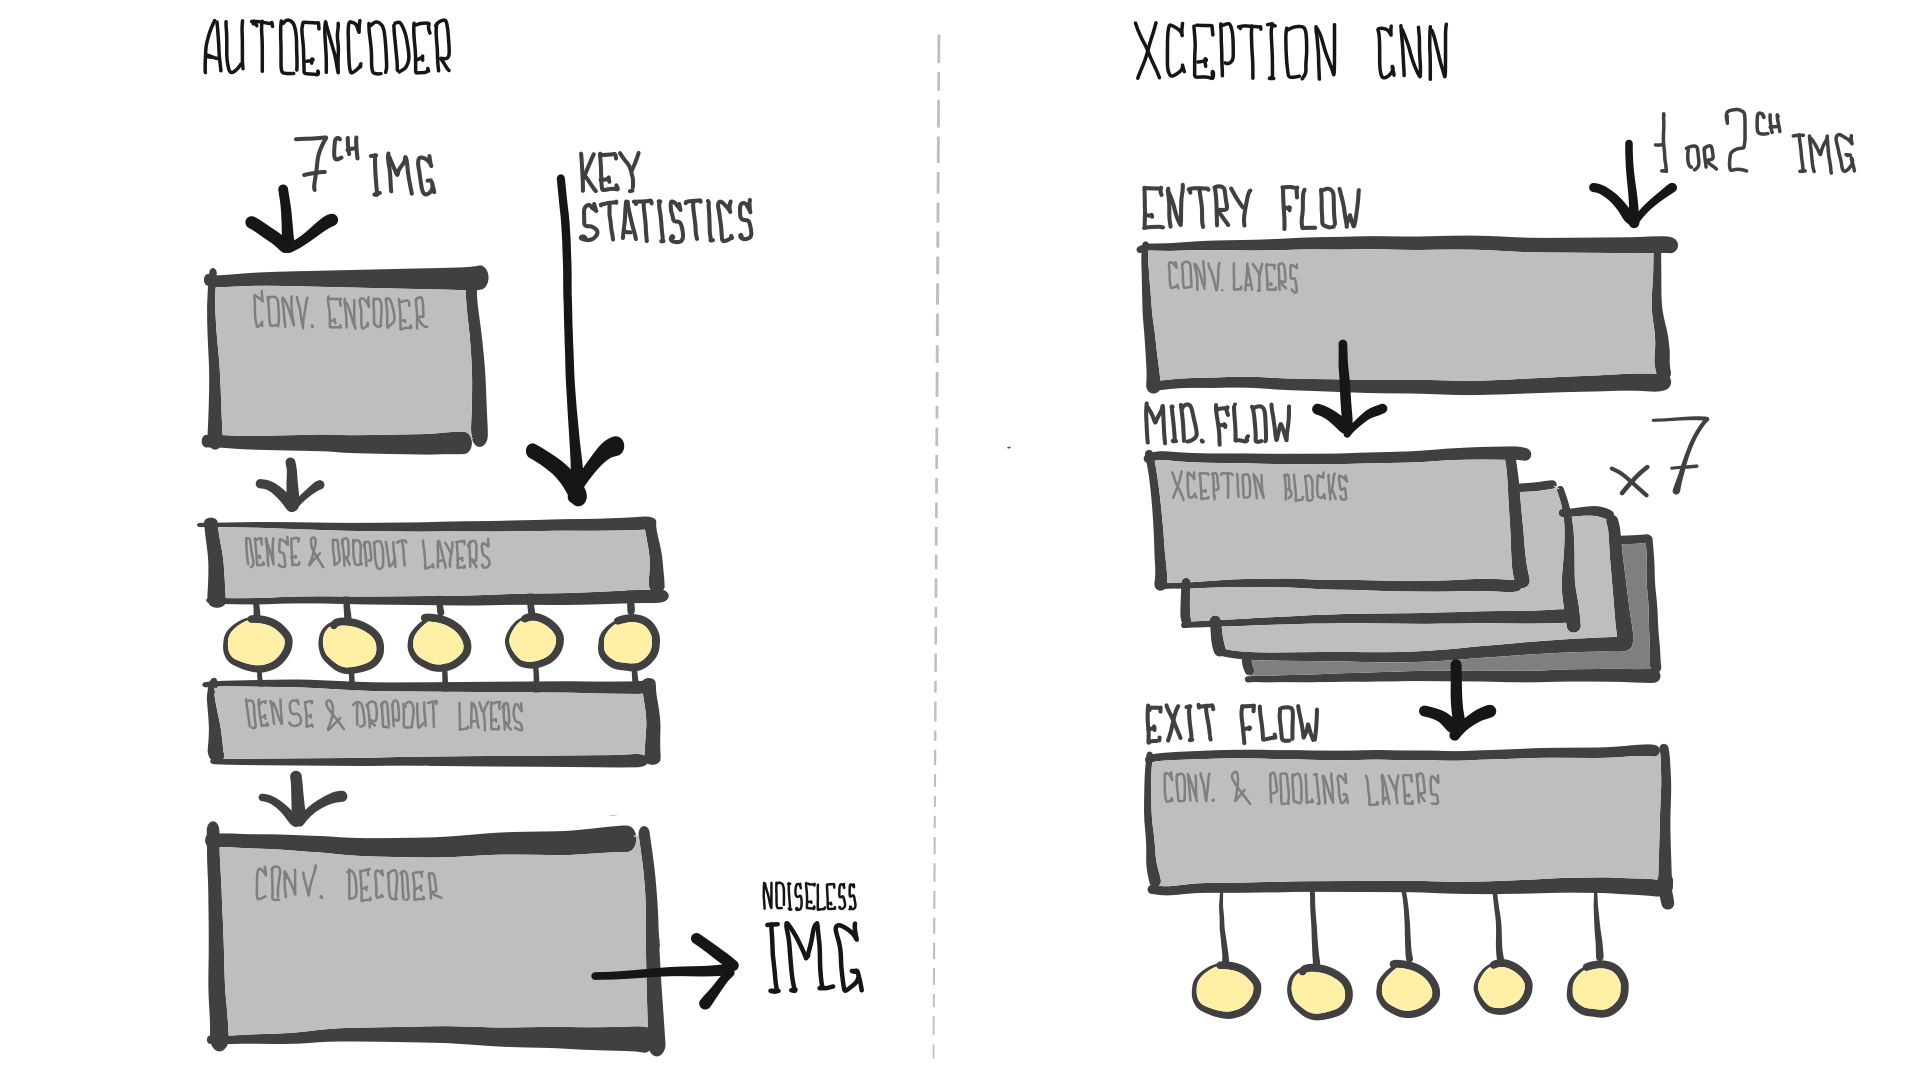

We end up with two final models. An autoencoder takes as input a noisy image of the galaxy, preprocessed images including the PSF, plus key statistics of the data. The encoder outputs the parameters as the latent space. The decoder reconstructs a noiseless image from the learned latent representation.

The second model is a CNN based on the Xception architecture. The network is deep, with 18 separable convolutional layers. Yet, the total number of parameters is just over 100K, making it fast and easy to work with.

# Performance Evaluation: Image Generation

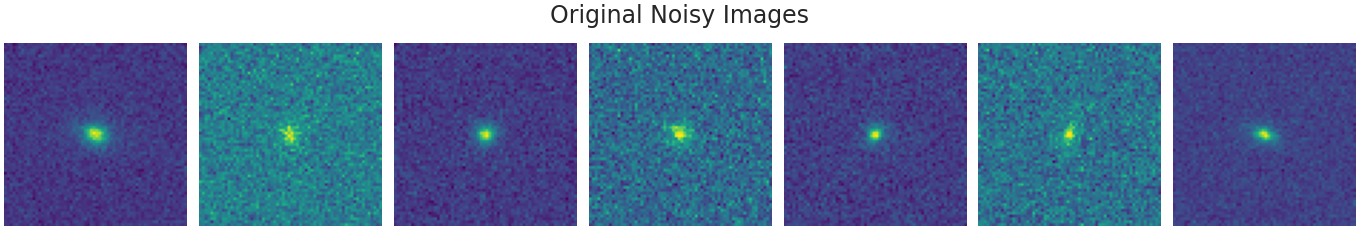
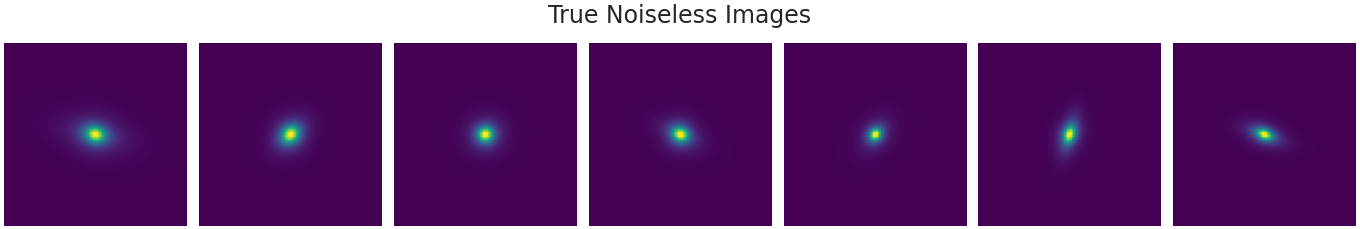
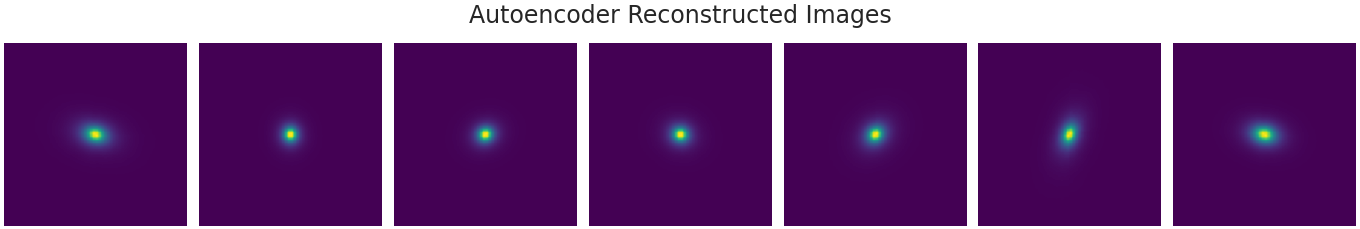

<!-- <img src="graphs/ori.png" />
<img src="graphs/cle.png" />
<img src="graphs/gen.png" /> -->

From a performance perspective, there are cases when the model does a reasonably good job of reconstructing the images. There are also situations where the differences are very apparent. Overall, we find that most of the error is concentrated in the center of the galaxy. Furthermore, we discover that the distortion is largely due to errors in parameter estimation, i.e. the encoder.

# Performance Evaluation: Predicted vs True

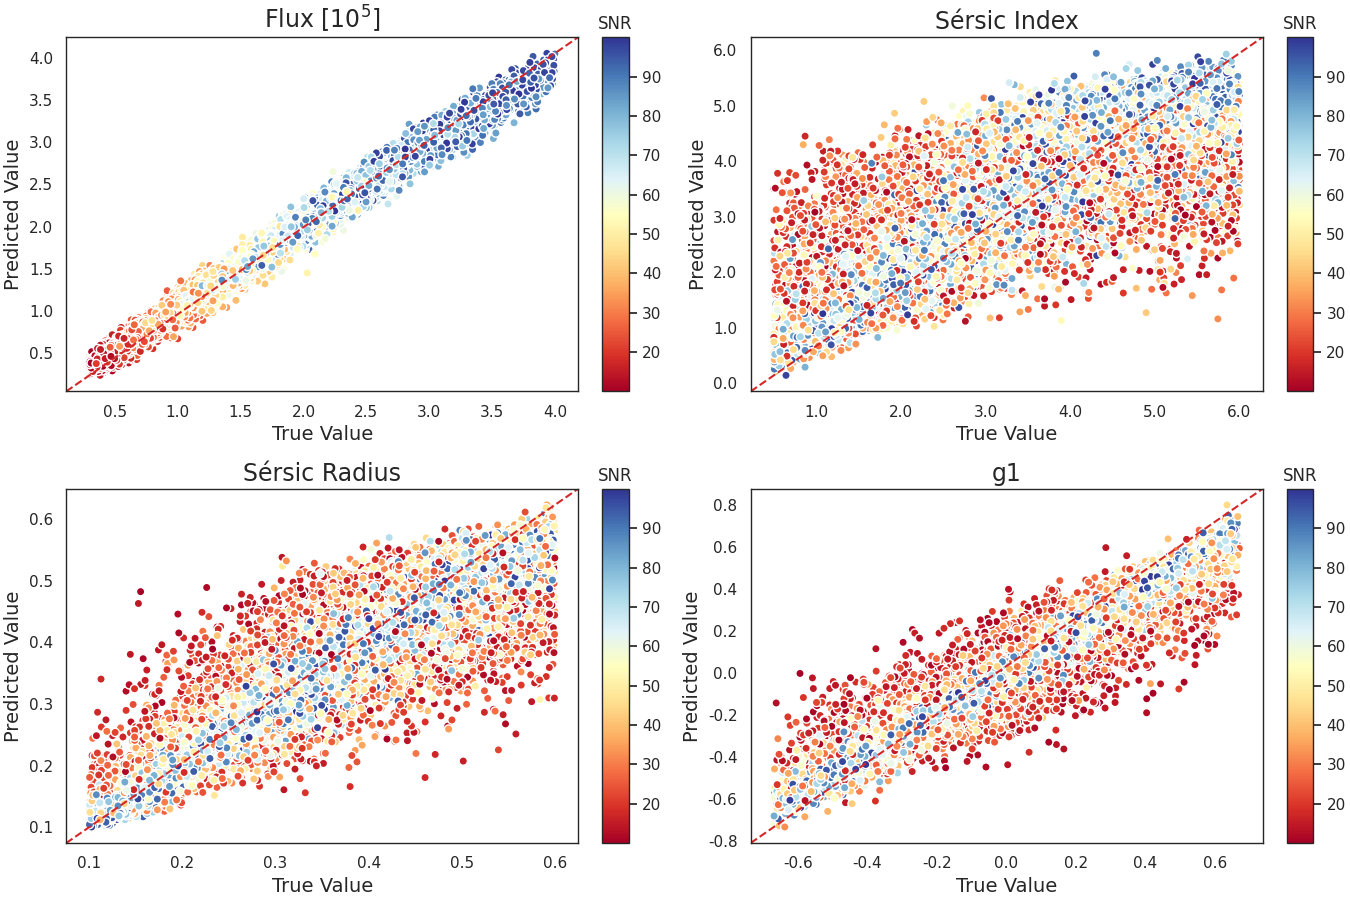

<!-- <img src="graphs/pred.png" style="width: 700px;"/> -->

The following plot shows predicted values against the true values, color-coded by the Signal to Noise Ratio. The model does a good job of predicting flux. The prediction error is small and there seems to be no significant bias. The prediction quality starts to gradually worsen with g1/g2 and Sersic Radius and takes a significant dip in with  Sersic Index.

Interestingly, the model works well in the case of high SNR images even for these parameters. For low SNR images, Sersic Index, Sersic Radius, and g1 suffer from a positive bias when the true parameter value is low and a negative bias when the true parameter value is high.

# Performance Evaluation: Cramér–Rao bound

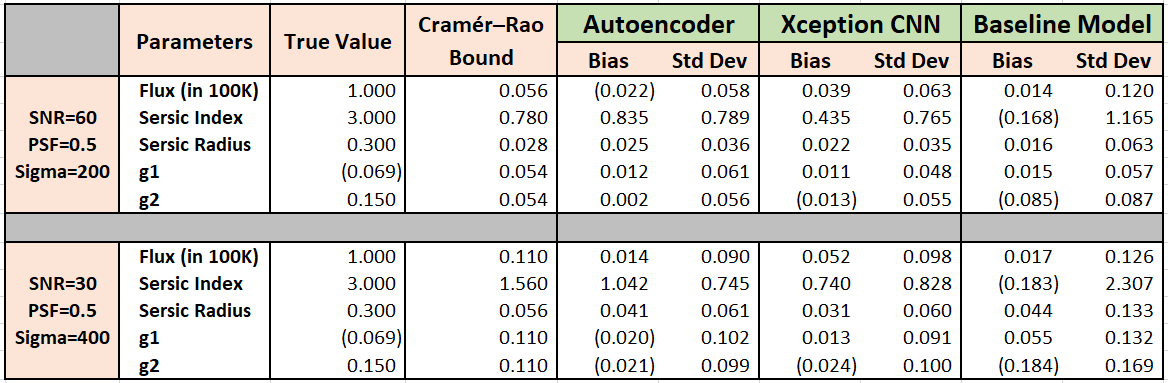

<!-- <img src="graphs/CRB_with_Baseline.png" style="width: 700px;"/> -->

When we train a network, our objective is to minimize the loss on a validation dataset. However, this does not help us judge how close or far we are from the best results we can achieve. A neural network is nothing but a "function estimator", with multiple parameters, and our network is estimating 5 different parameters. We also know that the total variance of any unbiased estimator is bounded by the Cramér–Rao lower bound. Here we can see our results vis-a-vis this lower bound. 

Firstly, our estimator is biased, and in theory, the variance can be made smaller at the cost of increasing the bias. However, if you notice, our biases are mostly less than the variance, and the standard deviations of our model errors are very close to the Cramér Rao bounds.

Along with reasonable estimates, on jupyterhub, our approach can process a million images in 15 minutes, whereas the conventional approach would take over a year.

# Future Work

**Grad-CAM and Saliency maps:** examining these may provide insights for improving the estimation of parameters like Sérsic Index and Sérsic Radius.

**Attention layers:** focusing a network's attention on particular regions on the image might prove useful for estimating galaxy parameters.

**Additional training:** can help improve the performance of some of our models.

**Ensuring robustness:** by incorporating uncertainty into our point estimates using Bayesian or frequentist methods we can make sure that the models can safely be used on out-of-distribution data.

**Real galaxy images:** training and testing on real data will demonstrate whether our proof-of-concept approach is applicable to actual astrophysical tasks.

We would like to end our presentation by going through some additional areas we could explore if given more time. This includes visualization of internal layers, additional training, using attention layers, making the solution more robust by incorporating uncertainty into the estimates, training & testing against real galaxy images. 

# <img style="float: left; padding-right: 10px; margin-top: 5px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B: Advanced Topics in Data Science

###  Measuring the Shape and Brightness of Galaxies with Neural Networks

###  Thank you!

#### Dmitry Vukolov, Ning Xu, Rohit Beri, Sunil Chomal

<br>

Source code available at: [github.com/dvukolov/cs109b-project](https://github.com/dvukolov/cs109b-project/)


Thank you! We are looking forward to answering your questions.